In [1]:
from skimage import filters, util, color, morphology
import numpy as np
from numpy import rot90,invert
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from scipy.ndimage.morphology import binary_hit_or_miss
from skimage.color import rgb2gray
from skimage.morphology import erosion, dilation, opening, closing,square,rectangle,binary_closing,disk
import cv2

def make_binary(img):
    T = filters.threshold_otsu(img)
    img[img <= T] = 0
    img[img > T] = 255
    return img

37


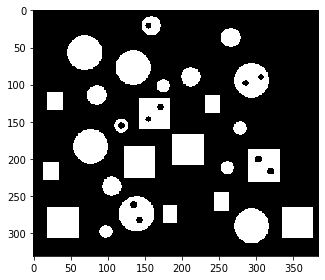

In [2]:
img_col = cv2.imread('objects.png')
img = cv2.cvtColor(img_col, cv2.COLOR_BGR2GRAY)
img = make_binary(img)
contours, hierarchy = cv2.findContours(img,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
imshow(img)
out = np.zeros(img.shape)
print(len(contours))


## objects with one or two holes

/home/nive/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


objects with one hole:  2
objects with two holes:  4


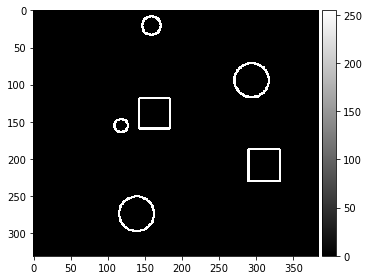

In [3]:
def object_with_holes(image):
    canvas = np.zeros(image.shape)
    one_hole = 0
    two_hole = 0

    max_num = np.amax(hierarchy) +1
    for c, h in zip(contours, hierarchy[0]):
        if h[2] != -1:
            if h[0] == -1:

                num_interior_contours = max_num - h[2]
            else: num_interior_contours = h[0]-h[2]
        else: num_interior_contours = 0
        
        if num_interior_contours == 1:
            cv2.drawContours(canvas, [c], -1, (255), 2)
            one_hole += 1
        if num_interior_contours == 2:
            two_hole += 1
            cv2.drawContours(canvas, [c], -1, (255), 2)
    imshow(canvas,cmap = 'gray')
    return(one_hole,two_hole,canvas)

one_hole,two_hole,im1 = object_with_holes(img)
im1 = make_binary(im1)
print("objects with one hole: ",one_hole)
print("objects with two holes: ", two_hole)

## no.of squares:

No.of squares:  11


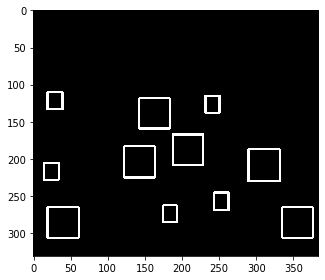

In [4]:
def count_squares(img):
    canvas = np.zeros(img.shape,np.uint8)
    
    count =0
    miss = np.array([[1,1,1],[1,0,0],[1,0,0]])
    hit = np.array([[0,0,0],[0,0,0],[0,0,0]])
    for c, h in zip(contours, hierarchy[0]):
        
        mask = np.zeros(img.shape,np.uint8)
        x = cv2.drawContours(mask,[c],0,255,-1)
        x = x & binary_hit_or_miss(x,hit,miss)

        if x.any() !=0:
            count += 1
            cv2.drawContours(canvas, [c], -1, 255, 2)
    return(canvas,count)
im2,count = count_squares(img)
imshow(im2,cmap='gray')

print("No.of squares: ",count)

## no.of squares with holes:

(331, 384) (331, 384)


/home/nive/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


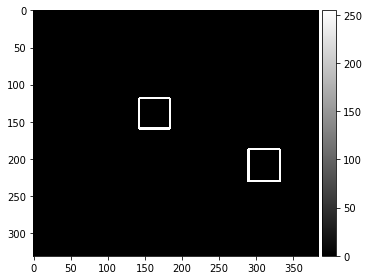

In [5]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(im1.shape,im2.shape)
def square_with_holes(img1,img2):
    i = np.where(img1 == 0,False,True)
    j = np.where(img2 == 0,False,True)
    x = i&j
    x = np.where(x ==False,0,255)
    return (x)
im2 = make_binary(im2)
im1 = make_binary(im1)
im3 = square_with_holes(im1,im2)
imshow(im3,cmap="gray")

## Circles without holes:

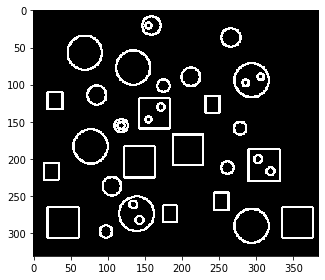

In [6]:
def all_contours(img):
    canvas = np.zeros(img.shape,np.uint8)
    
    count =0
    miss = np.array([[1,1,1],[1,0,0],[1,0,0]])
    hit = np.array([[0,0,0],[0,0,0],[0,0,0]])
    for c, h in zip(contours, hierarchy[0]):
        
        mask = np.zeros(img.shape,np.uint8)
        x = cv2.drawContours(mask,[c],0,255,-1)
        x = x & binary_hit_or_miss(x,hit,miss)

        if x.all() ==0:
            count += 1
            cv2.drawContours(canvas, [c], -1, 255, 2)
    return(canvas)
    
    return(canvas)
im2 = make_binary(im2)
im1 = make_binary(im1)
im4 = all_contours(img)
imshow(im4,cmap = 'gray')

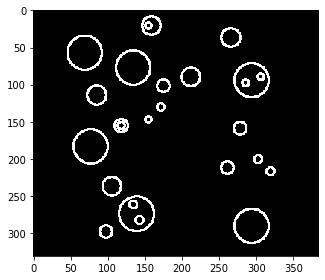

In [7]:
im5 = make_binary(im4 -im2)
imshow(im5,cmap = 'gray')

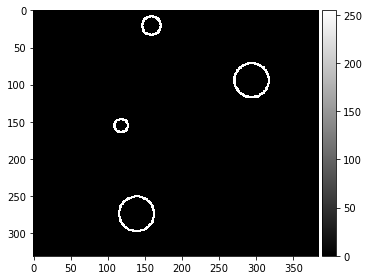

In [8]:
i = np.where(im1 == 0,False,True)
j = np.where(im5 == 0,False,True)
x = i&j
im6 = np.where(x ==False,0,255)
im6 = make_binary(im6)
imshow(im6,cmap = 'gray')

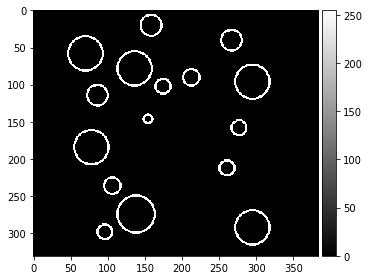

In [9]:
cimg = np.zeros(img.shape)
c = cv2.HoughCircles(im5, cv2.HOUGH_GRADIENT, 1, 20, param1=50,param2=22, minRadius=3,maxRadius=30)
c = np.uint16(np.around(c))
for i in c[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(255),2)
imshow(cimg,cmap='gray')